In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt #Graph Tool
%matplotlib inline
#inline을 적어줘야 안에서 Graph를 볼 수 있음

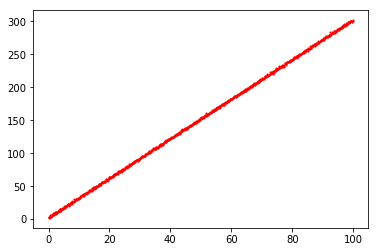

In [50]:
samples = 1000
#data = [i for i in range(samples)] #array로 변환하지 않으면 list가 append 되는 형태가 됨. 따라서 array로 변환 해줘야 함
data = np.array([i*0.1 for i in range(samples)], np.float32)
#print(data[:10])
label = 3 * data + 2.4 + np.random.randn(samples) #randn = random normal
#print(label[:20])

plt.scatter(data, label, 1, 'r') #plot은 선으로 그려주는 것이고, scatter로 그리면 점으로 표시됨
plt.show()

In [51]:
x = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)

In [52]:
w = tf.Variable(0, dtype=tf.float32)
b = tf.Variable(0, dtype=tf.float32)

In [53]:
y = w*x + b

In [54]:
loss = tf.losses.mean_squared_error(y_, y)
train_op = tf.train.GradientDescentOptimizer(1e-6).minimize(loss) #learning_rate

30677.7
26841.2
23484.5
20547.7
17978.1
15729.9
13762.9
12041.9
10536.1
9218.7
8066.02
7057.51
6175.14
5403.12
4727.65
4136.66
3619.59
3167.19
2771.36
2425.04
2122.04
1856.93
1624.98
1422.03
1244.47
1089.12
953.194
834.268
730.217
639.179
559.527
489.837
428.862
375.514
328.837
288.0
252.269
221.007
193.655
169.723
148.785
130.465
114.437
100.413
88.1438
77.4086
68.0161
59.7979
52.6077
46.317
40.8129
35.9971
31.7835
28.097
24.8716
22.0497
19.5804
17.4203
15.5303
13.8766
12.4297
11.1639
10.0562
9.08711
8.23931
7.49743
6.84839
6.28052
5.78365
5.34894
4.96855
4.6358
4.34461
4.08989
3.86702
3.672
3.50138
3.35204
3.2214
3.10715
3.00714
2.91965
2.84306
2.77608
2.71748
2.66614
2.62128
2.58203
2.54768
2.51764
2.49134
2.46834
2.44821
2.43058
2.41516
2.40165
2.38982
2.3795
2.37047
2.36256


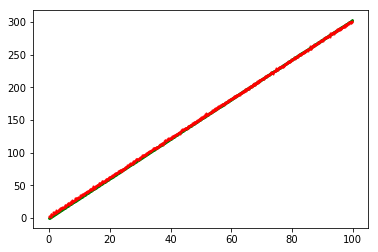

In [62]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(1000):
        _, _loss = sess.run([train_op, loss], feed_dict={x: data, y_: label}) #앞에 _는 return 받을 게 없다는 의미임
        if i%10 == 0:
            print(_loss)
        
    _pred = sess.run(y, feed_dict={x: data})
    plt.scatter(data, _pred, 2, 'g')
    plt.scatter(data, label, 1, 'r')
    plt.show()